# Why Machine Learning has been so popular?

* Manually crafting decision rules is feasible for some applications, particularly those in which humans have a good understanding of.
* Using machine learning, howerver, simply presenting a program with a collection of data might be enough.
* Supervised machine learning
    * identifying handwritten digits
    * determining whether a tumor is benign
    * detecting fraudulent activity in credit card transcations
* Unsupervised machine learning
    * indentifying topics in a set of blogs
    * segmenting customers into groups with similar preferences
    * detecting abnormal access patterns to a website
* For both supervised and unsupervised learning problems, it is important to have a representation of your input data that a computer can understand.
* Often it is helpful to think of your data as a table.
    * each entity or row is a sample, while the columns are called features
* No machine learning algorithm can make a prediction on data for which it has no infomation.

* The most important part in the machine learning process is understanding the data you are working with and how it relates to the task you want to solve.
    * What question(s) am I trying to answer?
    * Do I think the data collected can answer the question?
    * How to phrase my question(s) as a ml problem?
    * What features did I have, and will them enable the right predictions?
    * How to measure the success in my applications?
    * How will the ml solution interact with other parts if my research or products?
* In a large context, the algorithms and methods in ml are only one part of a greater process to solve a particular problem, and it's good to keep the big picture in mind at all times.Many people spend a lot of time building complex ml solutions, only to find out they don't solve the right problem.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import mglearn

### Some use of numpy

In [3]:
import numpy as np

In [4]:
X = np.array([[1, 2, 3], [4, 5, 6]])
print('X:\n{}'.format(X))

X:
[[1 2 3]
 [4 5 6]]


### Some use of scipy

In [5]:
from scipy import sparse

In [6]:
eye = np.eye(4)
print('Numpy array:\n{}'.format(eye))

Numpy array:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [7]:
# In the sparse matrix, only the nonzero entries are stored
sparse_matrix = sparse.csr_matrix(eye)
print('Scipy sparse CSR matrix:\n{}'.format(sparse_matrix))

Scipy sparse CSR matrix:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [8]:
# create sparse representations directly
data = np.ones(4)
row_indices = np.arange(4)
col_indices = np.arange(4)
eye_coo = sparse.coo_matrix((data, (row_indices, col_indices)))
print('COO sparse representation:\n{}'.format(eye_coo))

COO sparse representation:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


### Matplotlib

In [9]:
import matplotlib.pyplot as plt

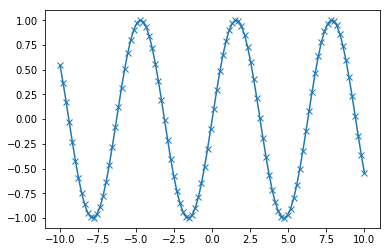

In [10]:
x = np.linspace(-10, 10, 100)
y = np.sin(x)
plt.plot(x, y, marker='x')

### pandas

In [11]:
import pandas as pd

In [12]:
data = {'Name': ['John', 'Anna', 'Peter', 'Linda'],
        'Location': ['New York', 'Paris', 'Berlin', 'London'],
        'Age': [24, 13, 53, 33]}
data_pandas = pd.DataFrame(data)
display(data_pandas)

,Name,Location,Age
0,John,New York,24
1,Anna,Paris,13
2,Peter,Berlin,53
3,Linda,London,33


In [13]:
data_pandas[data_pandas.Age>30]

,Name,Location,Age
2,Peter,Berlin,53
3,Linda,London,33


### A first application: classifying iris species

In [14]:
# This is a 3-class classification problem
from sklearn.datasets import load_iris

In [15]:
iris_dataset = load_iris()

In [16]:
iris_dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [17]:
print(iris_dataset['DESCR'][:193] + '\n...')

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [18]:
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [19]:
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [20]:
iris_dataset['data'].shape

(150, 4)

In [21]:
iris_dataset['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [22]:
iris_dataset['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Training data & test data

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

In [25]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((112, 4), (112,), (38, 4), (38,))

### First things first: look at your data

In [26]:
# Before building a machine learning model it is often a good idea to inspect data
# To see if the task is easily solvable without machine learning
# Or if the desired information might not contained in the data

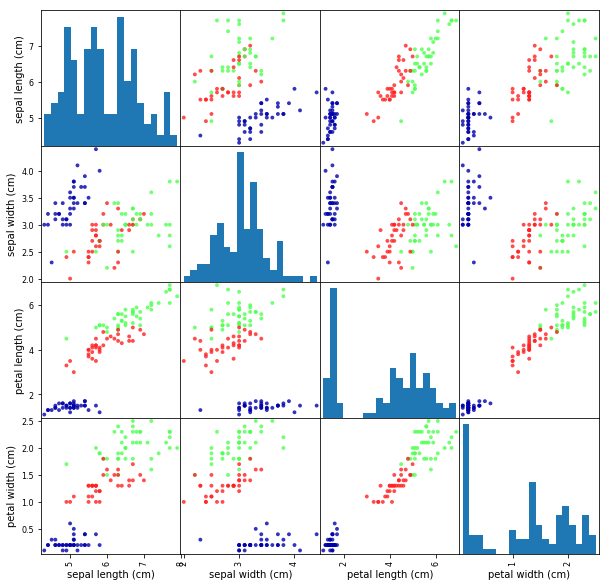

In [27]:
# using pandas to do a pair plot
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
grr = pd.scatter_matrix(iris_dataframe, c=y_train, figsize=(10, 10), hist_kwds={'bins': 20}, s=60, alpha=0.8, cmap=mglearn.cm3)

In [28]:
# The 3 classes seem to be relatively well separated using the sepal and petal meaturements.
# This means that a machine learning model will likely be able to learn to separate them

### Building your first model: K-Nearest Neighbors

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
knn = KNeighborsClassifier(n_neighbors=1)

In [31]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [32]:
# Most models in sklearn have many parameters, but the majority of them are either speed optimizations or for very special use cases

In [33]:
X_new = np.array([[5, 2.9, 1, 0.2]])
X_new.shape

(1, 4)

In [34]:
prediction = knn.predict(X_new)
print('Predictions:{}'.format(prediction))
print('Predicted target name: {}'.format(iris_dataset['target_names'][prediction]))

Predictions:[0]
Predicted target name: ['setosa']


### Evaluating the model

In [35]:
y_pred = knn.predict(X_test)
print('Test set predictions:\n{}'.format(y_pred))

Test set predictions:
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [36]:
print('Test set score:{:.2f}'.format(np.mean(y_pred == y_test)))

Test set score:0.97


In [37]:
print('Test set score:{:.2f}'.format(knn.score(X_test, y_test)))

Test set score:0.97


In [38]:
# The fit, predict, and score methods are the common interface to supervised model in sklearn.